<a href="https://colab.research.google.com/github/reypapin/Context-Learning-/blob/main/ollama_solar_prompting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ollama

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.1 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! sudo apt-get install -y pciutils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpci3 pci.ids
The following NEW packages will be installed:
  libpci3 pci.ids pciutils
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 343 kB of archives.
After this operation, 1,581 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 pci.ids all 0.0~2022.01.22-1 [251 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libpci3 amd64 1:3.7.0-6 [28.9 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 pciutils amd64 1:3.7.0-6 [63.6 kB]
Fetched 343 kB in 2s (207 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 3.)
debconf: falling back to frontend: Readline
debconf: unable to initializ

In [ ]:
! curl https://ollama.ai/install.sh | sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0>>> Downloading ollama...
100 10091    0 10091    0     0  22955      0 --:--:-- --:--:-- --:--:-- 22986
############################################################################################# 100.0%
>>> Installing ollama to /usr/local/bin...
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> NVIDIA GPU installed.
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [ ]:
import os
import threading
import subprocess
import requests
import json

def ollama():
    os.environ['OLLAMA_HOST'] = '0.0.0.0:11434'
    os.environ['OLLAMA_ORIGINS'] = '*'
    subprocess.Popen(["ollama", "serve"])

In [ ]:
ollama_thread = threading.Thread(target=ollama)
ollama_thread.start()

In [ ]:
! ollama run solar

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠇ pulling manifest ⠏ pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠇ pulling manifest ⠏ pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠇ pulling manifest ⠏ pulling manifest ⠋ pulling manifest 
pulling b18335425501...   0% ▕▏    0 B/6.1 GB                  pulling manifest 
pulling b18335425501...   0% ▕▏    0 B/6.1 GB                  pulling manifest 
pulling b18335425501...   0% ▕▏    0 B/6.1 GB                  pulling manifest 
pulling b18335425501...   0% ▕▏    0 B/6.1 GB                  pulling manifest 
pulling b18335425501...   0% ▕▏    0 B/6.1 GB                  pullin

In [ ]:
ollama_thread = threading.Thread(target=ollama)
ollama_thread.start()

In [ ]:
import pandas as pd

# File paths
dga_test_file = "/content/drive/My Drive/df_dga_test.csv"
normal_test_file = "/content/drive/My Drive/df_normal_test.csv"
dga_train_file = "/content/drive/My Drive/df_dga_train.csv"
normal_train_file = "/content/drive/My Drive/df_normal_train.csv"

# Load CSV files into dataframes
df_dga_test = pd.read_csv(dga_test_file, nrows=500)
df_normal_test = pd.read_csv(normal_test_file, nrows=500)
df_dga_train = pd.read_csv(dga_train_file, nrows=1000)
df_normal_train = pd.read_csv(normal_train_file, nrows=1000)



train_df = pd.concat([df_dga_train, df_normal_train])
train_df['labels'] = train_df['domain'].apply(lambda x: 0 if x in df_normal_train['domain'].values else 1)

test_df = pd.concat([df_dga_test, df_normal_test])
test_df['labels'] = test_df['domain'].apply(lambda x: 0 if x in df_normal_test['domain'].values else 1)

train_df.to_csv('train.csv', index=False)
test_df.to_csv('test.csv', index=False)

# Remove current order and shuffle data
train_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True)
test_df = test_df.sample(frac=1, random_state=42).reset_index(drop=True)

print(train_df)

                    domain  labels
0                 sony.com       0
1               rknphd.com       1
2             digicert.com       0
3           wuejhyhzhg.com       1
4               reddit.com       0
...                    ...     ...
1995  youtube-nocookie.com       0
1996   merriam-webster.com       0
1997        cnnmlrgakt.com       1
1998        wiktionary.org       0
1999                bit.ly       0

[2000 rows x 2 columns]


In [ ]:
import requests
import json

def classify_domain(domain, df, url='http://localhost:11434/api/chat'):

    # Create the introductory statement
    intro = (
        "You are a domain name classification system. Your task is to classify domain names as either 'dga' (Domain Generation Algorithm) or 'normal'. "
        "DGA domains are automatically generated by malware, while normal domains are not. "
        "I will provide you with labeled training data containing domain names and their classifications. "
        "After the training phase, you will classify a new domain and respond with either 'dga' or 'normal'. \n\n "

    )

    # Add labeled examples from the DataFrame
    prompt = intro
    for _, row in df.iterrows():
        label = "dga" if row['labels'] == 1 else "normal"
        prompt += f"{row['domain']}\n{{ 'domain': '{row['domain']}', 'result': '{label}' }}\n\n"

    # Add the new domain to classify
    prompt += f"{{ 'Now you classify this domain': '{domain}', 'only answer dga or normal, Do not provide any additional information or explanation ': "

    # Send the prompt to the model
    question = prompt + "}}"



    payload = {
        "model": "solar",
        "temperature": 0.6,
        "stream": False,
        "messages": [
            {"role": "system", "content": "You are an AI assistant!"},
            {"role": "user", "content": question}
        ]
    }
    response = requests.post(url, json=payload)
    message_str = response.content.decode('utf-8')
    message_dict = json.loads(message_str)
    return message_dict['message']['content']

# Example usage
domains = ["as.com", "youtube.com"]
for domain in domains:
    print(f"Domain: {domain}, Response: {classify_domain(domain, train_df)}")



Domain: as.com, Response: {'as.com': 'normal'}
Domain: youtube.com, Response:  {'youtube.com': 'normal'}


In [ ]:

# Apply classify_domain function to each domain in test_df and store the results in a new column
test_df['classification'] = test_df['domain'].apply(lambda domain: classify_domain(domain, train_df))

# Display the updated DataFrame
print(test_df)


                                     domain  labels  \
0                        cibinqosupport.com       0   
1                       hondaofannarbor.com       0   
2                             arrowrace.com       0   
3                             kyokai.com.br       0   
4    5dc4ffbe3751fb58157e1c96c83ef6e4.cz.cc       1   
..                                      ...     ...   
995   5129b56d02949f4c886e939b784cf310.info       1   
996                        kgvvownbvgqm.com       1   
997                             auxilium.hr       0   
998   mcc3ce33579c683ae93c57a8cf4b65912b.tk       1   
999                             foundia.com       1   

                                        classification  
0    The classification for the given domain "cibin...  
1    For the given domain "hondaofannarbor.com", it...  
2    For the given input of "arrowrace.com", I cann...  
3    The result for the provided domain 'kyokai.com...  
4    The given input is an object with two properti...

In [ ]:

# Convert 'classification' column to 0 or 1 based on the presence of the word "normal"
test_df['classification'] = test_df['classification'].apply(lambda x: 0 if 'normal' in x.lower() else 1)

# Display the updated DataFrame
print(test_df)


                                     domain  labels  classification
0                        cibinqosupport.com       0               0
1                       hondaofannarbor.com       0               0
2                             arrowrace.com       0               0
3                             kyokai.com.br       0               0
4    5dc4ffbe3751fb58157e1c96c83ef6e4.cz.cc       1               0
..                                      ...     ...             ...
995   5129b56d02949f4c886e939b784cf310.info       1               0
996                        kgvvownbvgqm.com       1               1
997                             auxilium.hr       0               0
998   mcc3ce33579c683ae93c57a8cf4b65912b.tk       1               1
999                             foundia.com       1               1

[1000 rows x 3 columns]


Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.75      0.73       500
           1       0.74      0.70      0.72       500

    accuracy                           0.73      1000
   macro avg       0.73      0.73      0.73      1000
weighted avg       0.73      0.73      0.73      1000



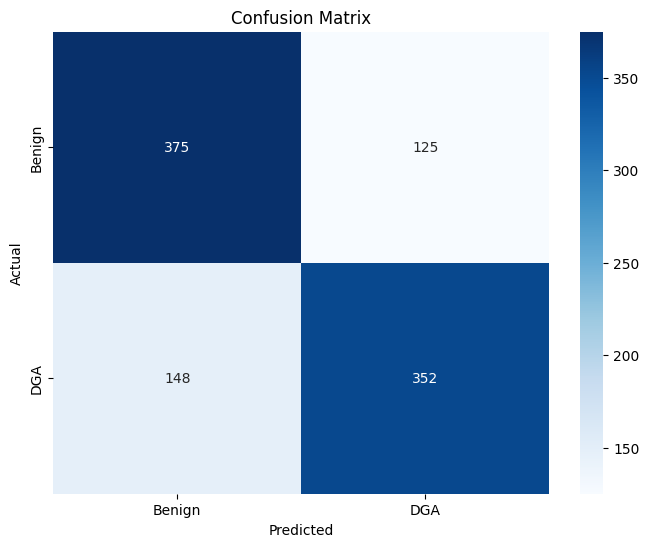

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate classification report
report = classification_report(test_df['labels'], test_df['classification'])
print("Classification Report:\n", report)

# Generate confusion matrix
conf_matrix = confusion_matrix(test_df['labels'], test_df['classification'])
#print("Confusion Matrix:\n", conf_matrix)


# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'DGA'], yticklabels=['Benign', 'DGA'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()